You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("penguins.csv")

# 1. EDA

In [4]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


[ENG]
- We have 4 numerical features
- there are no nulls data

[ESP]
- Tenemos 4 columnas numéricas
- No existen datos nulos


In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


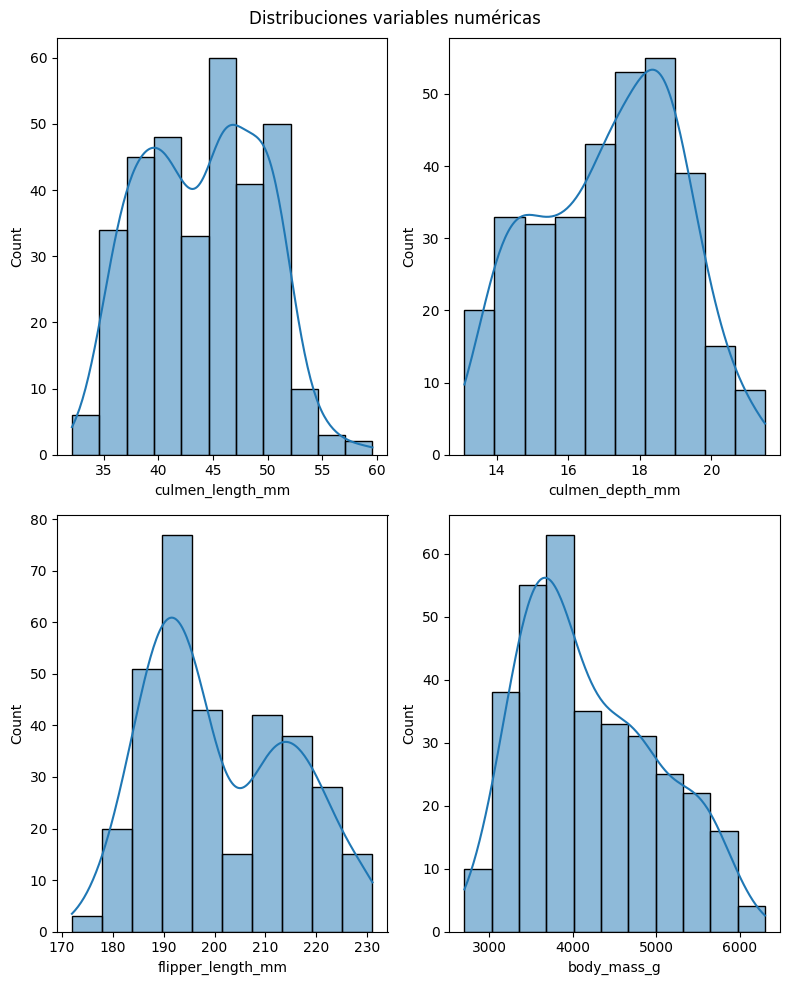

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(8, 10))
for i, col  in enumerate(df.select_dtypes('float')):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    
    
fig.suptitle('Distribuciones variables numéricas')
plt.tight_layout()
plt.show()


**Culmen Length (mm):**

**[ENG]**

This variable exhibits a bimodal distribution. The first mode appears to be between 20 and 43 mm, and the second mode between 43 and 58 mm. It seems that the data contain two subgroups with different culmen sizes.

**[ESP]**

Esta posee una distribución bimodal. La primera parece estar entre los 20 a 43 mm y la otra 43 a 58 mm. Parece se rque los datos tienen dos subgrupos con diferentes tamaños de culmen.


**Culmen Depth (mm):**
**[ENG]**

Similar to culmen length, the depth also appears to exhibit a bimodal distribution, albeit less pronounced. This pattern reinforces the idea that there are physical differences in the data.

**[ESP]**

Similar a la longitud del culmen, la profundidad también muestra una distribución bimodal, aunque menos pronunciada. Por lo tanto este patron refuerza la idea que hay diferencias fisica en los datos


**Flipper lenght (mm)**

**[ENG]**

This distribution appears to be trimodal, suggesting the possibility of three distinct subgroups. This could be related to differences in age, species, or even environmental adaptations.

**[ESP]**

Esta muestra una distribución que parece ser más bien trimodal, sugiriendo la posibilidad de tres subgrupos distintos en la muestra, lo que podría estar relacionado con diferencias de edad, especies o incluso adaptaciones ambientales.


**Body Mass (g):**

**[ENG]**

his distribution appears to be right-skewed, indicating that most penguins weigh between 3000 - 3800 g, but there are also quite a few larger individuals.
**[ESP]**

Parece ser que es una distribucón sesgada a la derecha dejandonos concluir que hay mas pinguonos que pesan entre 3000 - 3800 g pero que tambien hay varios que son bastante pesados

In [27]:
import itertools

columns= df.select_dtypes(float).columns

# Obtener todas las combinaciones posibles de pares
combinations = list(itertools.combinations(columns, 2))

# Mostrar las combinaciones
for combo in combinations:
    print(combo)

('culmen_length_mm', 'culmen_depth_mm')
('culmen_length_mm', 'flipper_length_mm')
('culmen_length_mm', 'body_mass_g')
('culmen_depth_mm', 'flipper_length_mm')
('culmen_depth_mm', 'body_mass_g')
('flipper_length_mm', 'body_mass_g')


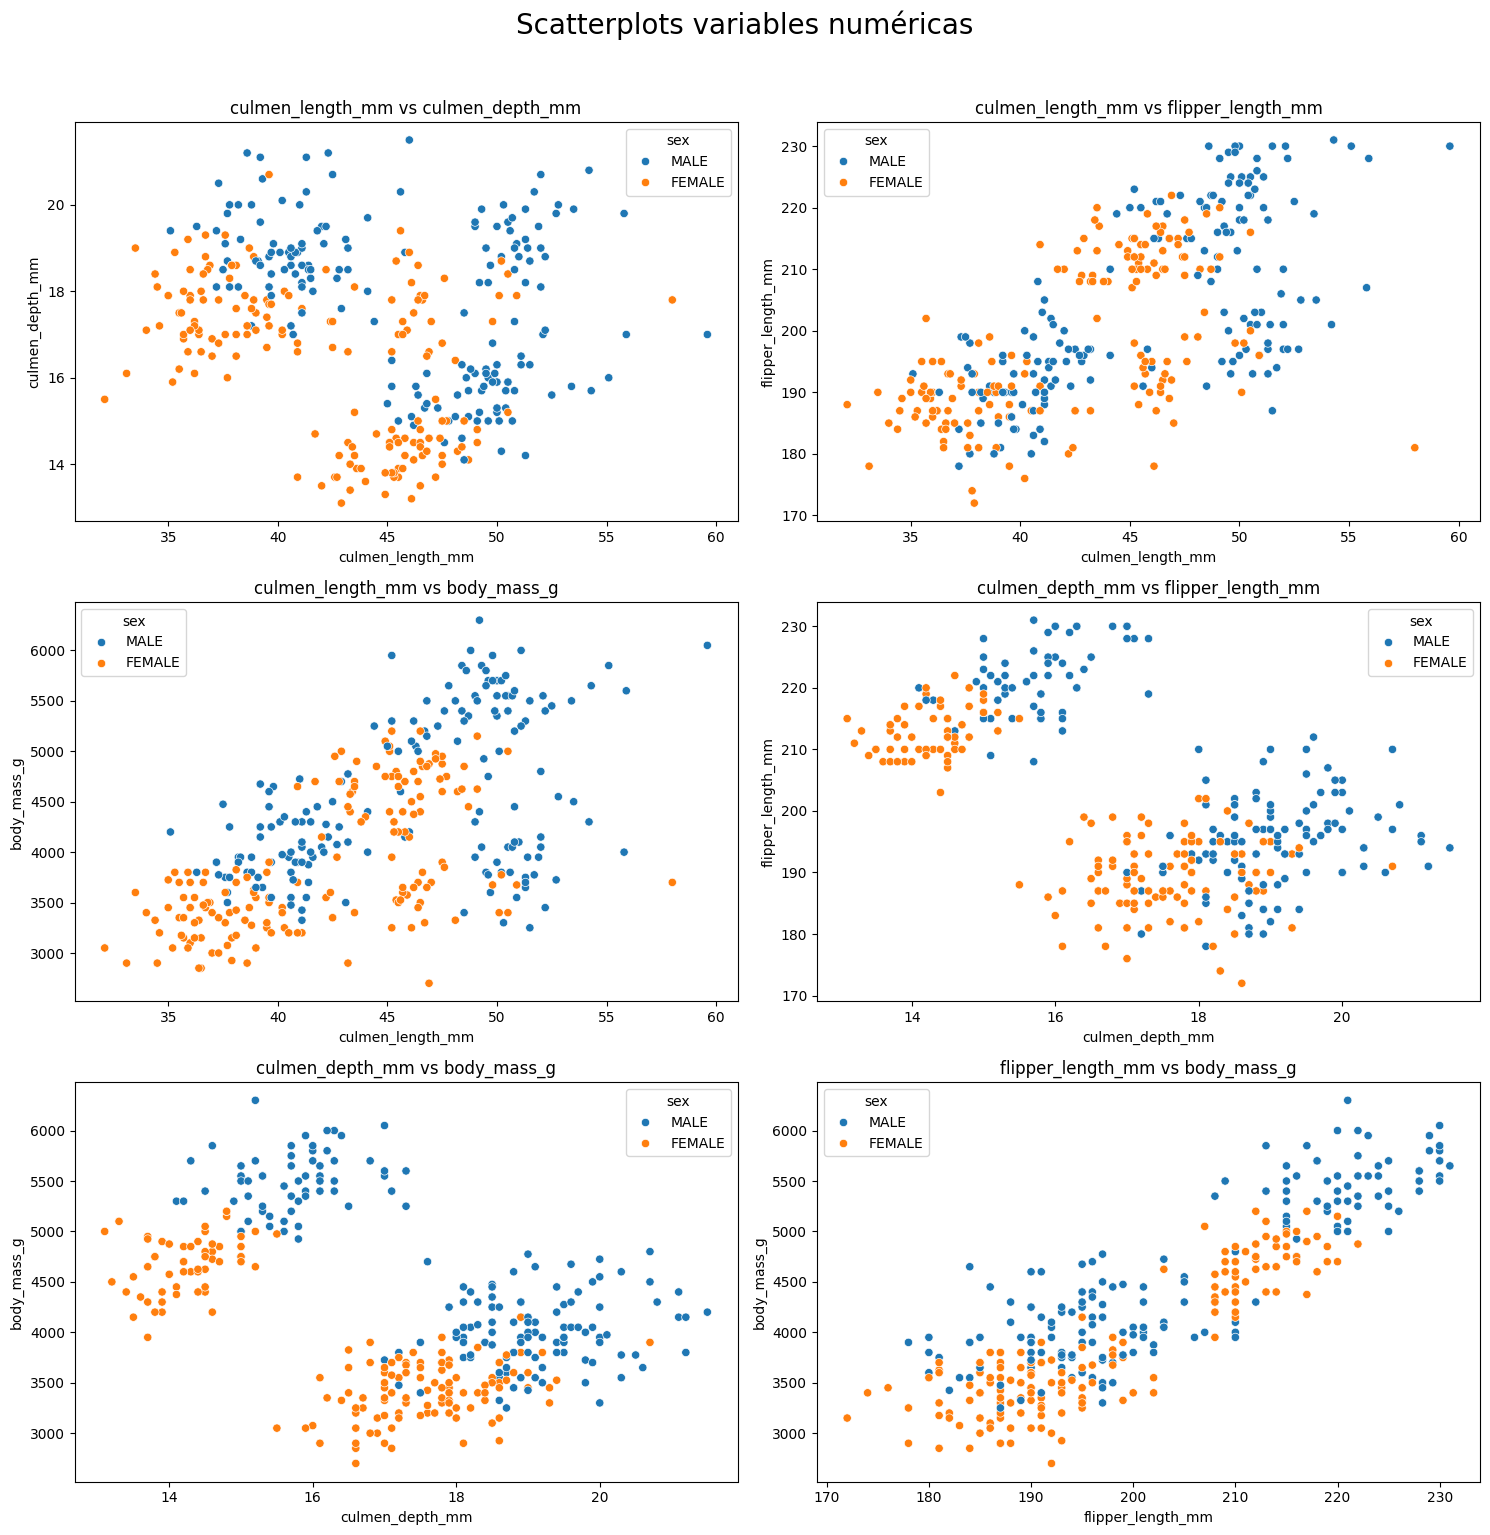

In [9]:

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Aplanar el array de ejes para un acceso fácil
axes = axes.flatten()

# Iterar sobre las combinaciones y los ejes
for i, (x, y) in enumerate(combinations):
    sns.scatterplot(x=x, y=y, hue='sex', data=df, ax=axes[i])
    axes[i].set_title(f'{x} vs {y}')
    

# Ajustar la disposición de los subplots
fig.suptitle('Scatterplots variables numéricas', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

**[ENG]**

- The scatterplots display relationships between various numerical traits of penguins, using sex as a categorical variable to differentiate between males and females.
- There appears to be a positive correlation between most measured variables. Notably, the body mass, culmen length, and flipper length all increase together, suggesting these traits are closely linked to the overall size of the penguins.
- The data suggest the presence of at least two distinct groups, possibly indicative of different species or sub-species within the penguin population.
- Male penguins tend to be heavier and larger in terms of both culmen length and flipper length compared to female penguins, although the difference is not overly pronounced.
- Relationship between depth and culmen lenght shows a distintic separation by sex, with males habing larger and deeper culmens.

**[ESP]**

[ESP]

- Los gráficos de dispersión muestran las relaciones entre varios rasgos numéricos de los pingüinos, utilizando el sexo como una variable categórica para diferenciar entre machos y hembras.
- Parece haber una correlación positiva entre la mayoría de las variables medidas. Notablemente, la masa corporal, la longitud del culmen y la longitud de la aleta aumentan juntas, sugiriendo que estos rasgos están estrechamente vinculados al tamaño general de los pingüinos.
- Los datos sugieren la presencia de al menos dos grupos distintos, posiblemente indicativos de diferentes especies o subespecies dentro de la población de pingüinos.
- Los pingüinos machos tienden a ser más pesados y más grandes en términos de longitud del culmen y longitud de la aleta en comparación con las pingüinas, aunque la diferencia no es excesivamente pronunciada.
- La relación entre la profundidad y la longitud del culmen muestra una separación distintiva por sexo, con los machos teniendo culmens más largos y profundos.

# 2. MODELING

In [28]:
# converting sex to boolean
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

In [30]:
# Standarazing our data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

penguin_scaled = pd.DataFrame(X_scaled, columns=df.columns)


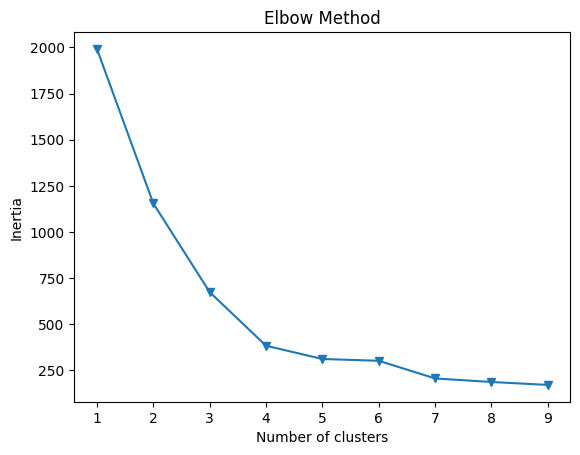

In [31]:
# Searching for best k

intertia = []


for i in range(1, 10):

    model = KMeans(n_clusters=i, random_state=42)
    model.fit(penguin_scaled)
    intertia.append(model.inertia_)

plt.plot(range(1, 10), intertia, marker='v')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [32]:

n_clusters = 4

In [33]:
# Creating the model
k_means = KMeans(n_clusters=n_clusters, random_state=42)
k_means.fit(X_scaled)
predicted_label = k_means.labels_
df['predict_label'] = predicted_label


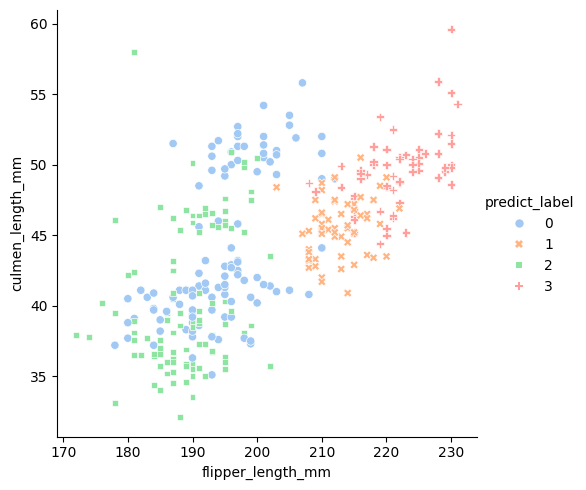

In [35]:
sns.relplot(kind='scatter', x='flipper_length_mm', y='culmen_length_mm', data=df, hue='predict_label', palette='pastel',style='predict_label')
plt.show()

In [45]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','predict_label']
stat_penguins = df[numeric_columns].groupby('predict_label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
predict_label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
